# Análise Exploratória de Dados (EDA) - Parte 3

## -> Identificação e tratamento de outliers
Para identificar outliers, podemos utilizar um tipo de gráfico muito útil nesse tema: o `boxplot`. <br>

Um **boxplot** é um gráfico que ajuda a visualizar como os dados estão distribuídos. Ele mostra informações essenciais sobre o conjunto de dados de forma clara e concisa, e seus principais componentes são:
- Caixa: Representa a faixa onde a maioria dos dados está concentrada, delimitada pelo primeiro quartil (Q1) e o terceiro quartil (Q3).
- Mediana: Uma linha dentro da caixa indica a mediana (Q2), que é o valor central dos dados.
- Linhas externas: Estendem-se a partir da caixa até os valores mais baixos e mais altos que estão dentro de um limite específico.
- Outliers: Pontos que ficam além das linhas externas são considerados outliers, ou seja, valores que se afastam significativamente do restante dos dados.

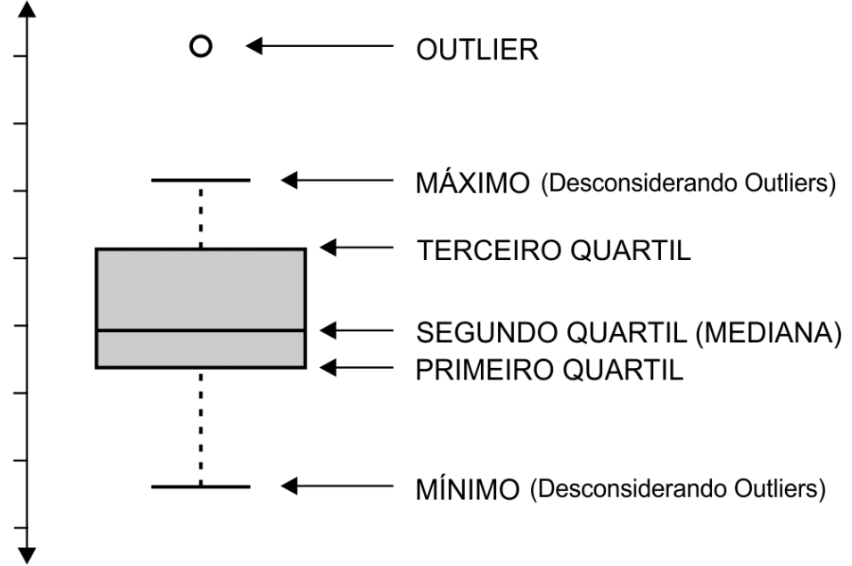

In [ ]:
# em código, podemos visualizar um boxplot da seguinte maneira:
import matplotlib.pyplot as plt

# Dados fixos
data = [1, 2, 5, 6, 7, 8, 9, 10, 12, 15, 25]

# Criar o boxplot
plt.boxplot(data)

# Adicionar título e rótulo ao eixo y
plt.title('Exemplo de Boxplot')
plt.ylabel('Valores')

# Exibir o gráfico
plt.show()

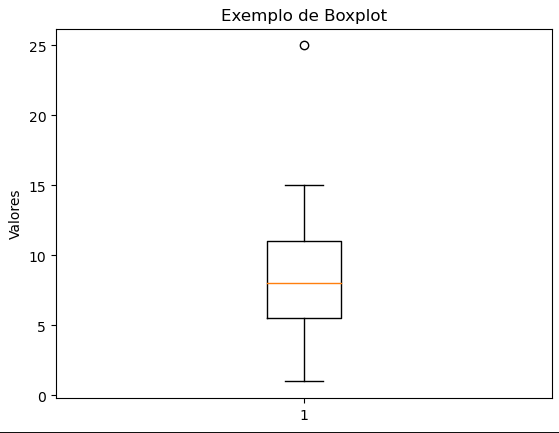

- Esse ponto em círculo é o que é chamado de Outlier. Podem haver vários outliers, como pode ser visto no seguinte exemplo:

In [ ]:
# se quisermos criar um boxplot a uma coluna em particular:

# Definir o tamanho da figura
plt.figure(figsize=(8, 8))

# Criar o boxplot para a coluna 'Fare'
plt.boxplot(df['Fare'])

# Adicionar título e rótulo ao eixo y
plt.title('Boxplot de Fare')
plt.ylabel('Fare')

# Exibir o gráfico
plt.show()

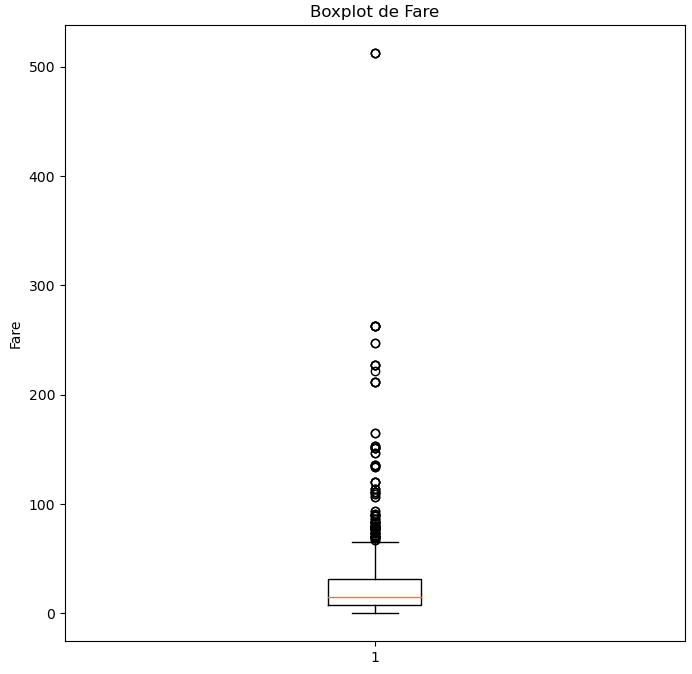
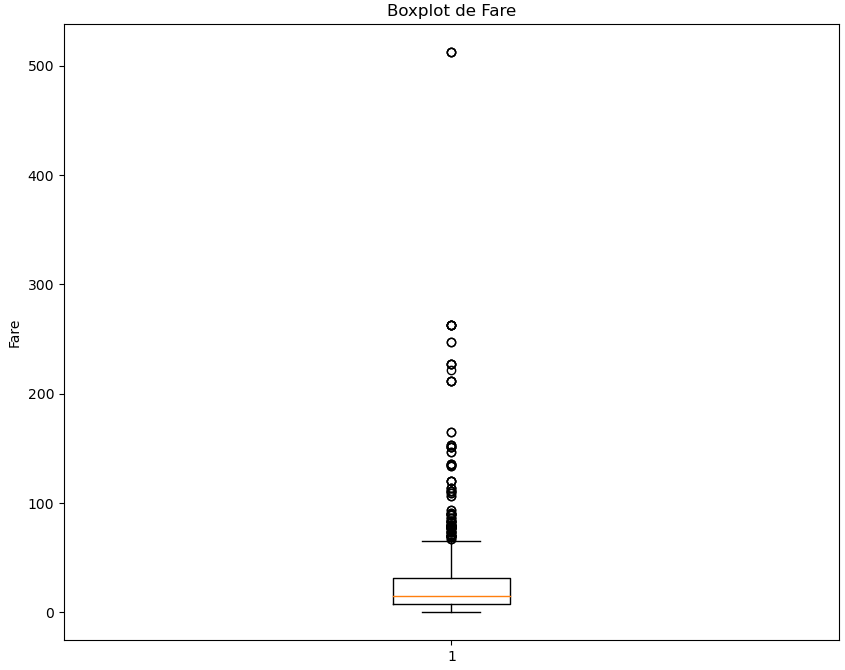

### Conclusões
Podemos ver que há vários outliers. <br>
Eles são valores que estão significativamente acima do intervalo interquartil. Em outras palavras, eles são identificados como valores que estão acima de 1,5 vezes o IQR do terceiro quartil. <br>

No gráfico, vemos que há muitos com valores muito mais altos que a maioria dos dados, indicando que alguns passageiros pagaram tarifas bem mais altas do que a média. <br><br>
Decerto, os outliers podem ter várias interpretações dependendo do contexto, como:
- Viagens em classes mais luxuosas ou com cabines especiais.
- Tarifas de última hora ou preços premium devido a condições especiais.
- Outros fatores desconhecidos que impactam o preço pago.

-------------

## Como podemos tratar Outliers?

### 1ª estratégia: Remoção de Outliers
- Simples Exclusão: Remover os valores que estão além de um certo limite (por exemplo, valores acima de 1,5 vezes o IQR ou fora de 3 desvios-padrão da média).
    - Vantagem: Elimina os efeitos distorcivos dos outliers nos modelos.
    - Desvantagem: Pode resultar em perda de informações, especialmente se os outliers contêm informações valiosas.

### 2ª estratégia: Transformação dos dados
- Log Transform: Aplicar uma transformação logarítmica para reduzir o efeito dos outliers.
    - Vantagem: Mantém todos os dados, mas diminui a influência dos valores extremos.
    - Desvantagem: Funciona melhor em variáveis estritamente positivas.

### 3ª estratégia: Estabelecer um threshold (limite)
Ao definir um threshold, estabelecemos limites máximos e mínimos para os dados, e qualquer valor fora desses limites é considerado um outlier.

**Como Estabelecer um Threshold** <br>
Podemos definir o threshold de diferentes maneiras, dependendo dos dados e do contexto:
1. Percentis (Quantis)
- Uma abordagem comum é usar quantis, como o 1º percentil e o 99º percentil, para estabelecer o intervalo aceitável de valores. <br> Qualquer coisa fora desse intervalo pode ser considerada um outlier.

In [ ]:
# exemplo
lower_threshold = df['Fare'].quantile(0.01)
upper_threshold = df['Fare'].quantile(0.99)
df_filtered = df[(df['Fare'] >= lower_threshold) & (df['Fare'] <= upper_threshold)]

2. Valores de Negócio ou Contextuais
- Em alguns casos, o threshold pode ser estabelecido com base em conhecimento específico do domínio. <br>Por exemplo, se você está lidando com tarifas de passagens, pode haver um valor máximo que se espera que as tarifas atinjam, ou um valor mínimo não realista.

In [ ]:
# exemplo
upper_threshold = 250  # Limite máximo aceitável para 'Fare'
df_filtered = df[df['Fare'] <= upper_threshold]

3. Média e desvio padrão:
- Podemos utilizar um threshold baseado em uma medida estatística (a média) e o desvio padrão multiplicado por um fator. Qualquer valor que esteja além desse threshold é considerado outlier. Abaixo, o limite superior foi calculado pela média somada ao desvio padrão multiplicado por 2.7.

    -> **Por que 2.7?** <br>
    O fator 2.7 usado no cálculo para determinar o threshold superior (média + 2.7 * desvio padrão) pode ser explicado da seguinte forma:
    - Desvios padrão e a distribuição normal: <br>
    Em uma distribuição normal, a maioria dos dados se encontra dentro de um certo número de desvios padrão da média. Por exemplo: <br>
        - Cerca de 68% dos dados estão dentro de 1 desvio padrão da média.
        - Cerca de 95% dos dados estão dentro de 2 desvios padrão.
        - Cerca de 99.7% dos dados estão dentro de 3 desvios padrão. <br>
    
        Esses são os intervalos comuns, e muitos métodos de detecção de outliers utilizam 2 ou 3 desvios padrão como limites.

    - Uso do fator 2.7: <br>
    O valor 2.7 foi escolhido como uma forma ligeiramente menos conservadora do que usar 3 desvios padrão, que já incluiria quase todos os dados de uma distribuição normal. Ao usar 2.7, capturamos aproximadamente 99% dos dados, permitindo que os outliers extremos (aqueles além desse valor) sejam identificados e tratados, enquanto ainda mantém a maior parte dos dados originais.

In [ ]:
import numpy as np

def tratar_outliers_media_desvio(df, coluna):
    # Calcular a média e desvio padrão
    media = df[coluna].mean()
    desvio = df[coluna].std()
    
    # Definir o threshold superior (usando 2.7 como multiplicador)
    threshold_superior = media + 2.7 * desvio
    
    # Substituir valores acima do threshold pelo valor máximo permitido
    df[coluna] = np.where(df[coluna] > threshold_superior, threshold_superior, df[coluna])

    return df

# Exemplo de uso
df_train = tratar_outliers_media_desvio(df_train, 'Coluna')

### Adendo
Se você se sentiu um pouco perdido/a nessa parte, não se preocupe. Lidar com outliers exige um conhecimento além de estatística. Na verdade, existem cursos inteiros destinados somente a como lidar com outliers. <br>
No geral, existem essas estratégias que mencionei, mas há muitas outras abordagens. <br>
Abaixo, coloquei alguns vídeos e materiais bons para essa parte. No mais, não fique preocupado/a ou focado estritamente em aprender essa parte. É algo que aprendemos conforme formos praticando, tendo mais conhecimento em estatística e vendo exemplos de tratamento de outliers alheios.

#### Para aprender mais sobre como lidar com outliers: 
https://franciscofoz.medium.com/como-tratar-outliers-sem-exclu%C3%AD-los-19dd5c1ba3e6 <br>
https://dev.to/franciscojdsjr/tratamento-de-outliers-no-pandas-estrategias-e-exemplos-51ji <br>
https://medium.com/@lucapqg/como-detectar-e-tratar-outliers-com-python-ca2cf088c160 <br>
https://www.youtube.com/watch?v=zVPutS5iqc8&ab_channel=BeeDataUSP <br>
https://www.youtube.com/watch?v=CLN-y_4ZySw&t=371s&ab_channel=M%C3%A1quinasInteligentes